In [1]:
import malaya

In [2]:
positive_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
negative_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

## Load multinomial model

In [3]:
model = malaya.sentiment.multinomial()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.27780816431771815, 'positive': 0.7221918356822792}
{'negative': 0.4230539695981826, 'positive': 0.5769460304018175}


[{'negative': 0.4230539695981826, 'positive': 0.5769460304018175},
 {'negative': 0.4230539695981826, 'positive': 0.5769460304018175}]

## Load xgb model

In [4]:
model = malaya.sentiment.xgb()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.44467238, 'positive': 0.5553276}
{'negative': 0.47532737, 'positive': 0.5246726}


[{'negative': 0.47532737, 'positive': 0.5246726},
 {'negative': 0.47532737, 'positive': 0.5246726}]

## List available deep learning models

In [5]:
malaya.sentiment.available_deep_model()

['fast-text',
 'hierarchical',
 'bahdanau',
 'luong',
 'bidirectional',
 'bert',
 'entity-network']

In [6]:
for i in malaya.sentiment.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.sentiment.deep_model(i)
    print(model.predict(negative_text))
    print(model.predict_batch([negative_text, positive_text]))
    print()

Testing fast-text model
{'negative': 0.99185514, 'positive': 0.008144839}
[{'negative': 0.8494132, 'positive': 0.15058675}, {'negative': 0.04582213, 'positive': 0.95417786}]

Testing hierarchical model
{'negative': 0.16548774, 'positive': 0.83451223, 'attention': [['kerajaan', 0.109089434], ['sebenarnya', 0.3137235], ['sangat', 0.2670205], ['bencikan', 0.24073339], ['rakyatnya', 0.05572654], ['minyak', 0.008767789], ['naik', 0.0037751873], ['segalanya', 0.0011636332]]}
[{'negative': 0.08488519, 'positive': 0.9151148}, {'negative': 0.09536239, 'positive': 0.90463763}]

Testing bahdanau model
{'negative': 0.27857047, 'positive': 0.7214295, 'attention': [['kerajaan', 0.1346821], ['sebenarnya', 0.023742322], ['sangat', 0.03039956], ['bencikan', 0.6389645], ['rakyatnya', 0.048371714], ['minyak', 0.035900667], ['naik', 0.05980329], ['segalanya', 0.02813588]]}
[{'negative': 0.48411715, 'positive': 0.5158828}, {'negative': 0.31343234, 'positive': 0.6865676}]

Testing luong model
{'negative': 0

## Train a multinomial model using custom dataset

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('tests/02032018.csv',sep=';')
df = df.iloc[3:,1:]
df.columns = ['text','label']
corpus = df.text.tolist()

corpus should be [(text, label)]

In [9]:
dataset = [[df.iloc[i,0],df.iloc[i,1]] for i in range(df.shape[0])]
bayes = malaya.sentiment.train_multinomial(dataset)

             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        13
    Neutral       0.67      0.12      0.21        16
   Positive       0.55      1.00      0.71        32

avg / total       0.46      0.56      0.43        61



#### You also able to feed directory location

```
directory
    |
    |- adidas
    |- apple
    |- hungry
```

In [10]:
bayes = malaya.sentiment.train_multinomial('tests/local')

             precision    recall  f1-score   support

     adidas       0.96      0.61      0.74       319
      apple       0.97      0.59      0.73       448
     hungry       0.78      0.92      0.84      1081
   kerajaan       0.85      0.83      0.84      1379
       nike       0.95      0.48      0.64       335
pembangkang       0.71      0.85      0.78      1497

avg / total       0.82      0.80      0.79      5059



In [11]:
bayes.predict('saya suka kerajaan dan anwar ibrahim', get_proba = True)

{'adidas': 0.0005316133415573243,
 'apple': 0.0006248454476189618,
 'hungry': 0.009494739464502444,
 'kerajaan': 0.0773079001887801,
 'nike': 0.0005656482161409733,
 'pembangkang': 0.9114752533414014}

#### Train a multinomial using skip-gram vectorization

In [12]:
bayes = malaya.sentiment.train_multinomial(
    'tests/local', vector = 'skip-gram', ngram_range = (1, 3), skip = 5
)

             precision    recall  f1-score   support

     adidas       0.37      0.82      0.51       330
      apple       0.50      0.90      0.64       484
     hungry       0.82      0.94      0.88      1028
   kerajaan       0.90      0.60      0.72      1404
       nike       0.59      0.80      0.68       312
pembangkang       0.88      0.53      0.66      1501

avg / total       0.78      0.71      0.71      5059



In [13]:
bayes.predict('saya suka kerajaan dan anwar ibrahim', get_proba = True)

{'adidas': 9.851832247652223e-14,
 'apple': 3.1811421800860636e-14,
 'hungry': 4.87301131586436e-10,
 'kerajaan': 5.936421621648095e-07,
 'nike': 9.654000712770611e-14,
 'pembangkang': 0.9999994058703183}

## Unsupervised important words learning

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # i just really like seaborn colors

#### Visualizing bahdanau model

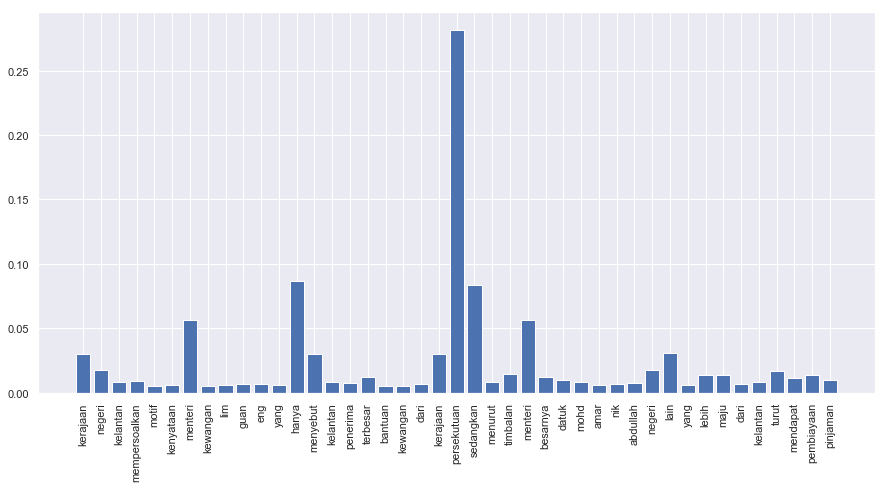

In [17]:
model = malaya.sentiment.deep_model('bahdanau')
result = model.predict(positive_text)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing luong model

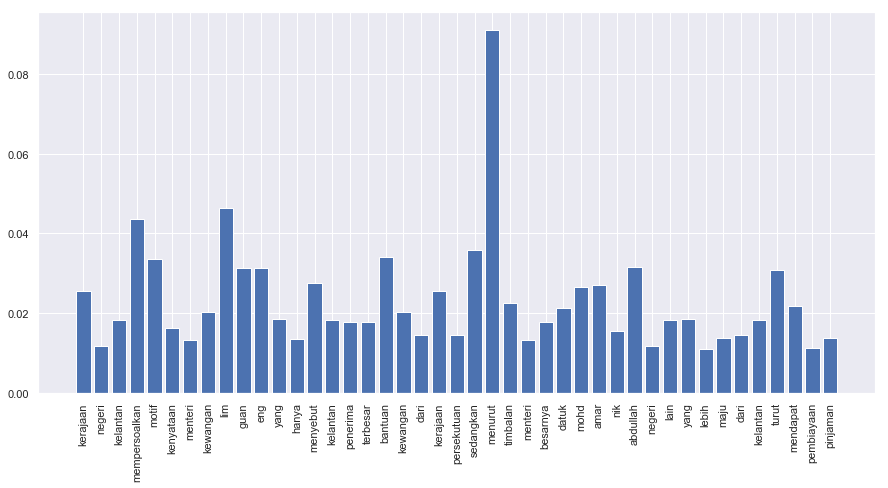

In [18]:
model = malaya.sentiment.deep_model('luong')
result = model.predict(positive_text)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing hierarchical model

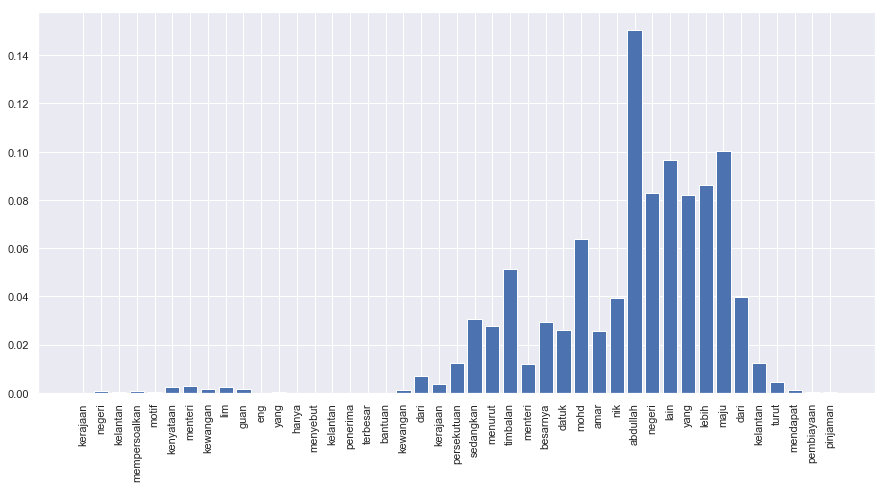

In [19]:
model = malaya.sentiment.deep_model('hierarchical')
result = model.predict(positive_text)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()